Epoch 1/12


C:\Users\linoyh\AppData\Local\anaconda3\envs\DataScience\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - accuracy: 0.0907 - loss: 2.4231 - val_accuracy: 0.0914 - val_loss: 2.4136
Epoch 2/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.0920 - loss: 2.4104 - val_accuracy: 0.0914 - val_loss: 2.4020
Epoch 3/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.0932 - loss: 2.3998 - val_accuracy: 0.0914 - val_loss: 2.3908
Epoch 4/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.0941 - loss: 2.3867 - val_accuracy: 0.0914 - val_loss: 2.3801
Epoch 5/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 269ms/step - accuracy: 0.0953 - loss: 2.3790 - val_accuracy: 0.0916 - val_loss: 2.3697
Epoch 6/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.0988 - loss: 2.3666 - val_accuracy: 0.0918 - val_loss: 2.3598
Epoch 7/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.1040 - loss: 2.3586 - val_accuracy: 0.0952 - val_loss: 2.3503
Epoch 8/12
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.1044 - loss: 2.3500 - val_accuracy: 0.101

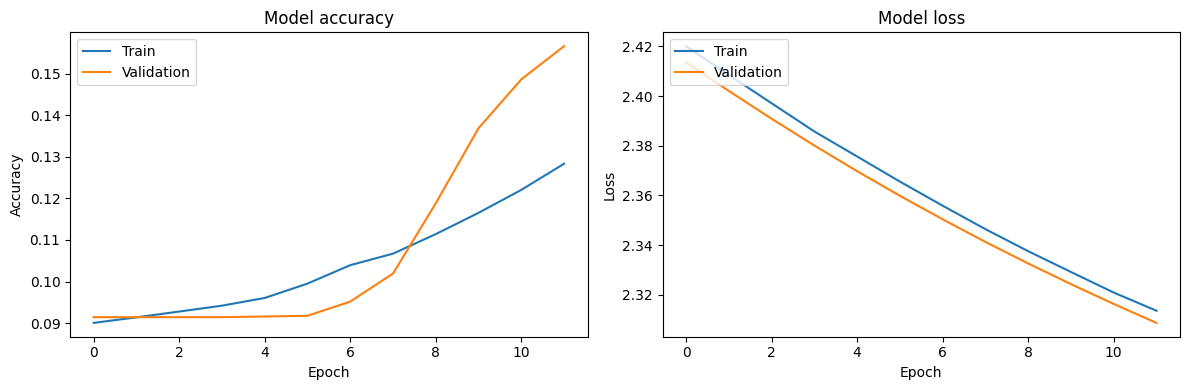

In [1]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta
from keras.datasets import mnist #import the datasets of mnist
from keras.models import Model
from keras.layers import Dense, Input #input layers . dense- fully connected
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten #convolution layer , pooling layer , dropout regularization, flattern before fully conne.
from keras import backend as k
import matplotlib.pyplot as plt #

(x_train, y_train), (x_test, y_test) = mnist.load_data()
"""
(x_train, y_train), (x_test, y_test) = mnist.load_data() - here we take two sets . one for test and one for train
the mnist function knows to split the data for test and for train

"""
img_rows, img_cols=28, 28

"""
img_rows, img_cols=28, 28 - img_rows = 28 , img_cols = 28

"""

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

"""
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

in these two lines we make the x_train and x_test to floating 
"""

x_train /= 255
x_test /= 255

"""
x_train /= 255
x_test /= 255

in these line we normalize the x_train and x_test (max values) by dividing to 255
"""

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

"""
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
make the "y" to a categorical value

"""

inpx = Input(shape=inpx) # the first layer - input
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)

"""
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
convolution layer 
32- the size of the layer , how mach neorons we have in the layer that will be connected to our input
kernel size- 3X3 matrix size of kernel
activation - activation function of the kernel
(inpx) - operate this layer on the backward layer that it's name is "(inpx)"
"""

layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)

"""
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
MaxPooling2D - opening a pooling layer 
pool_size - the pooling size
(layer2) - operate this layer on the backward layer that it's name is "(layer 2)"
"""
layer4 = Dropout(0.5)(layer3)

"""
layer4 = Dropout(0.5)(layer3)
drop half from the neorons that in layer 3

"""
layer5 = Flatten()(layer4)
"""
layer5 = Flatten()(layer4)
make the flattern to layer 4
"""
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

model = Model([inpx], layer7)
model.compile(optimizer=Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
"""
compile - build the network
"""
history = model.fit(x_train, y_train, epochs=12, batch_size=500, validation_split=0.2)

"""
fit - to take the y and x train and make on the 12 epochs , training the model
validation_split - how much precentage  to take from the train for validation
"""

score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()